# Контест по BI
### Зеленин Герман Евгеньевич
#### Подтверждаю, что работа выполнена самостоятельно

### Задача 2

Попробуем сначала применить линейную регрессию к нашим данным

In [271]:
import pandas as pd

In [272]:
data = pd.DataFrame([[0.78, 3, 0.4, 9],
                    [0.61, 7, 4.5, 20],
                    [0.41, 2.8, 4, 10],
                    [0.08, 3.4, 3.8, 10],
                    [0.03, 1.3, 2.2, 6],
                    [0.52, 8.3, 6.2, 100],
                    [0.19, 2, 1.8, 1],
                    [0.78, 4.5, 2.7, 18],
                    [0.05, 2.1, 5, 20],
                    [0.31, 8, 6.8, 35],
                    [0.65, 4, 4.2, 17],
                    [0.03, 1.3, 2.2, 6],
                    [0.39, 7.5, 5.5, 30],
                    [0.64, 5, 5.2, 21],
                    [0.97, 2.3, 1.4, 2],
                    [0.59, 7.1, 5.1, 25],
                    [0.97, 3.4, 0.2, 5],
                    [0.97, 9, 5.7, 70],
                    [0.20, 0.4, 7, 13],
                    [0.03, 1.3, 2.2, 6],
                    [0.48, 6, 1, 16],
                    [0.47, 1, 3.3, 1]], 
columns=['features1', 'features2', 'features3', 'buy'])

In [273]:
data

,features1,features2,features3,buy
0,0.78,3.0,0.4,9
1,0.61,7.0,4.5,20
2,0.41,2.8,4.0,10
3,0.08,3.4,3.8,10
4,0.03,1.3,2.2,6
5,0.52,8.3,6.2,100
6,0.19,2.0,1.8,1
7,0.78,4.5,2.7,18
8,0.05,2.1,5.0,20
9,0.31,8.0,6.8,35


Построим матрицу визуализации данных

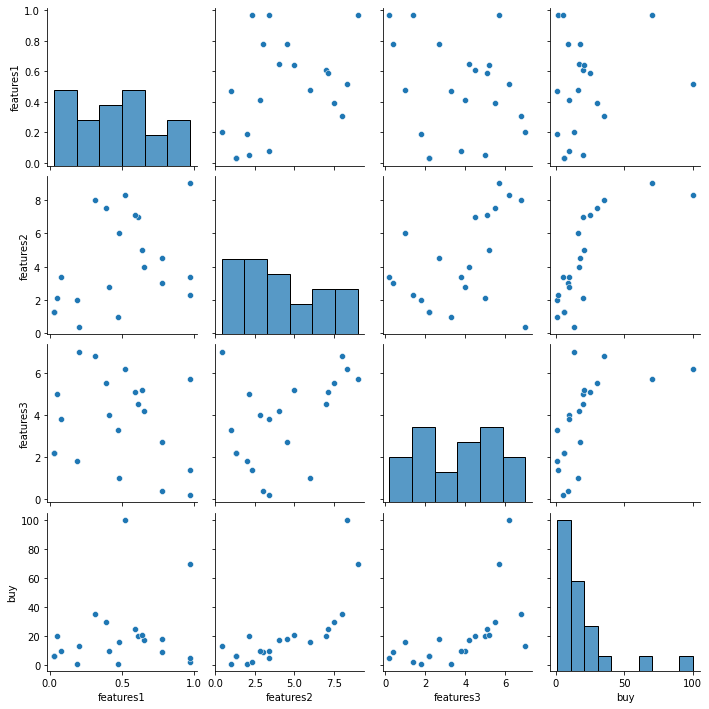

In [274]:
import seaborn as sns
sns.pairplot(data);

Возможны выбросы для цены 70 и 100. Попробуем проверить это на диаграмме boxplot

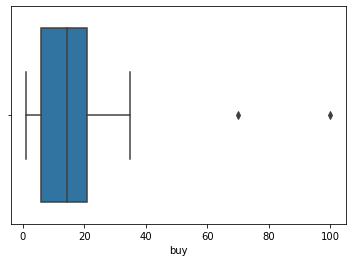

In [275]:
ax = sns.boxplot(x=data["buy"])

Выбросы обнаружились. Попробуем удалить их и применить линейную регрессию на новых данных

In [276]:
data_new = pd.DataFrame([[0.78, 3, 0.4, 9],
                    [0.61, 7, 4.5, 20],
                    [0.41, 2.8, 4, 10],
                    [0.08, 3.4, 3.8, 10],
                    [0.03, 1.3, 2.2, 6],
                    [0.19, 2, 1.8, 1],
                    [0.78, 4.5, 2.7, 18],
                    [0.05, 2.1, 5, 20],
                    [0.31, 8, 6.8, 35],
                    [0.65, 4, 4.2, 17],
                    [0.03, 1.3, 2.2, 6],
                    [0.39, 7.5, 5.5, 30],
                    [0.64, 5, 5.2, 21],
                    [0.97, 2.3, 1.4, 2],
                    [0.59, 7.1, 5.1, 25],
                    [0.97, 3.4, 0.2, 5],
                    [0.20, 0.4, 7, 13],
                    [0.03, 1.3, 2.2, 6],
                    [0.48, 6, 1, 16],
                    [0.47, 1, 3.3, 1]], 
columns=['features1', 'features2', 'features3', 'buy'])

In [277]:
import statsmodels.api as sm

In [278]:
x = data_new[['features1','features2', 'features3']]
y = data_new['buy']

In [279]:
x = sm.add_constant(x)

/Users/germanzelenin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [280]:
model = sm.OLS(y, x).fit()

In [281]:
model.params

const       -3.235237
features1   -2.286328
features2    2.859672
features3    2.125612
dtype: float64

In [282]:
model.rsquared

0.8897369199959974

Результат очень хороший

In [306]:
pred = model.predict([1, 0.03, 1.3, 2.2])

Ответ:

In [307]:
pred[0]

5.090092378842784

Итак, после построения различных графиков, мною не было найдено конкретной зависимости между отдельным признаком и ценой. Были удалены данные, являющиеся выбросами. На основе новых подправленных данных была построенна хорошая регрессия. Кроме того, с увеличением данных результаты можно улучшить

### Задача 4

Создадим датафрейм с данными экспериментов

In [293]:
import matplotlib

data_4 = pd.DataFrame([[1, 20, 5],
                     [1, 25, 6],
                     [1, 30, 8],
                     [2, 20, 8],
                     [2, 25, 9],
                     [2, 30, 12],
                     [3, 20, 10],
                     [3, 25, 13],
                     [3, 30, 13],
                     [4, 20, 18],
                     [4, 25, 19],
                     [4, 30, 20],
                    ], 
columns=['dose', 'temp', 'kill'])

In [294]:
data_4

,dose,temp,kill
0,1,20,5
1,1,25,6
2,1,30,8
3,2,20,8
4,2,25,9
5,2,30,12
6,3,20,10
7,3,25,13
8,3,30,13
9,4,20,18


**Первая гипотеза: чем выше дозировка, тем лучше средство**. Усредним значение убитых на разных температурах одной дозировки.

In [295]:
arr_kills = pd.DataFrame([], columns=['dose', 'mean'])
for i in range(1,5):
    new_row = {'dose': i, 'mean': data_4[data_4["dose"] == i]["kill"].mean(axis=0)}
    arr_kills = arr_kills.append(new_row, ignore_index=True)
print(arr_kills)

   dose       mean
0   1.0   6.333333
1   2.0   9.666667
2   3.0  12.000000
3   4.0  19.000000


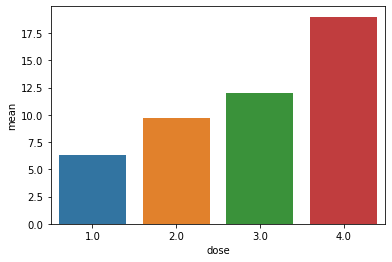

In [296]:
sns.barplot(data=arr_kills, x="dose", y="mean");

Мы видим, что в среднем, количество погибших вредителей растет от увеличения дозировки

**Вторая гипотеза: чем выше температура при одинаковой дозе, тем лучше средство действует**.

Построим диаграммы для 4 разных доз зависимости числа уничтоженных вредителей от температуры.

Одна дозировка


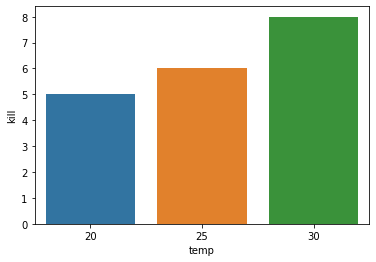

In [297]:
print("Одна дозировка")
sns.barplot(data=data_4[data_4["dose"] == 1], x="temp", y="kill");

Две дозировки:


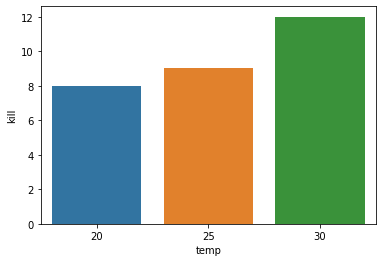

In [298]:
print("Две дозировки:")
sns.barplot(data=data_4[data_4["dose"] == 2], x="temp", y="kill");

Три дозировки:


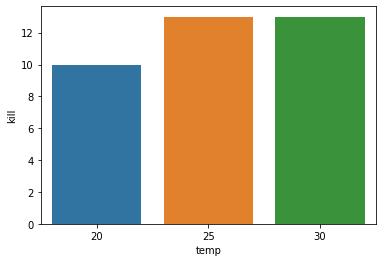

In [299]:
print("Три дозировки:")
sns.barplot(data=data_4[data_4["dose"] == 3], x="temp", y="kill");

Четыре дозирвоки:


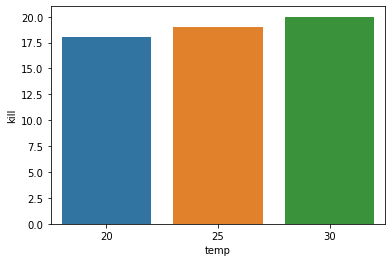

In [300]:
print("Четыре дозирвоки:")
sns.barplot(data=data_4[data_4["dose"] == 4], x="temp", y="kill");

**Вывод:** При одной, двух, четырех дозировках наблюдается позитивный "восходящий" тренд. На трех дозировках наблюдается совпадение количество погибших на 25 градусах и 30. Можно сказать, что это погрешность (таракан оказался слабеньким 😂)

**Третья гипотеза** И температура и дозировка взаимно влияют

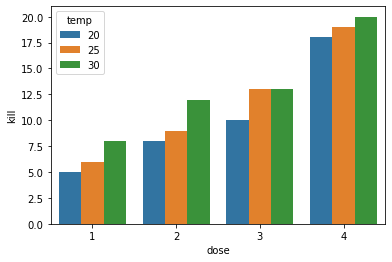

In [301]:
sns.barplot(
    x="dose", 
    y="kill", 
    hue="temp",
    data=data_4
);

**Вывод** Видим, что число погибших насекомых увеличивается одновременно по мере роста дозировки и роста температуры на каждой дозе

Можно ли считать такие выводы хоть сколько нибудь полезными? Скорее нет, чем да. Каждое насекомое - разный организм. Отличия в 1-2 смерти при увеличении температуры или дозировки можно вполне списать на индивидуальные характеристика каждого насекомого. Лучшие выводы можно получить при получении большего количества данных. Если мы проведем, например, несколько экспериментов при 20 градусах с одной, двумя, тремя и четырмя дозировками, то сможем провести анализ четырех выборок. Существуют различные критерии для проверки различаются ли выборки или нет (для нормальных - критерий Барлета, Шеффе, ненормальных - Краскела, Данна и другие)

### Задача 1 (MySQL)

1) Найти регион с покупкой более чем двумя типами товаров из таблицы Sales (названия таблицы в задании не было задано, поэтому пришлось название ввести самому); 

Будем использовать вложенный запрос: SELECT Region, count(DISTINCT ItemName) as Count FROM Sales GROUP BY Region
Этот запрос формирует таблицу из названия региона и количества уникальных (!) типов товаров
После этого мы выбираем из этой таблички названия регионов, в которых количество уникальных регионов > 2

**Ответ:** SELECT Region FROM (SELECT Region, count(DISTINCT ItemName) as Count FROM Sales GROUP BY Region) as Sales2 WHERE Sales2.Count >2


2) Найти среднюю стоимость 2х наиболее часто покупаемых типов товаров 

За частоту я взял общее количество купленных товаров (SUM(Qty)), за стоимость была взята разность между NetSales (выручка) и Proffit (прибыль), деленная на общее количество. Однако задачу можно интерпретировать по-разному: за стоимость взять NetSales, а за количество - количество "чеков". Но запрос кардинально от этого не поменяется. Для решения использовался вложенный запрос.

**Ответ:** SELECT ItemName, ItemCount, MeanPrice FROM (SELECT ItemName, (SUM(NetSales) - SUM(Proffit))/SUM(Qty) as MeanPrice, SUM(Qty) as ItemCount FROM Sales GROUP BY ItemName) as A ORDER BY ItemCount DESC LIMIT 2

3) Рассчитать среднее время (кол-во дней) между покупками в каждом регионе

Данная задача решается с помощью оконных функций. Первый вложенный массив представляет из себя табличку строк чеков, но с столбцами Region, ActualDate и LastDate - дата совершения предыдущей покупки в этом регионе. После этого основной запрос считает среднее время между чеками с помощью функции AVG

**Ответ:** SELECT Region, AVG(ActionDate - LastDate) as MeanNumber FROM (
  SELECT Region, ActionDate, LAG(ActionDate) OVER(PARTITION BY Region ORDER BY ActionDate ASC) as LastDate FROM Sales ORDER BY Region ASC
) as A GROUP BY Region

5) Отсортировать по дате покупок и для первых 5 строк посчитать скользящее среднее NetSales c размером окна 3 - т.е. средней из текущей, предыдущей и следующей строчек

Используем окно из трех строк и применяем его к таблице из первых 6 строк, отсортированных по ActualDate. Это необходимо, чтобы для 5-ой строчки конкретно посчиталось значение скользящего среднего.

**Ответ:** SELECT *, avg(NetSales) over w as roll_avg FROM (SELECT * FROM Sales ORDER BY ActionDate LIMIT 6) as Sales window w as (rows between 1 preceding and 1 following) LIMIT 5

6) За каждый день вывести канал привлечения с максимальным GMV, и собственно сам GMV этого канала

Запрос получился большим и скорее всего можно сильно проще. В первом вложенном запросе группируем по ActionDate и Medium, высчитываем GMV. Далее сортируем в каждой дате каналы привлечения по убыванию. После выбираем самую первую строку в каждой группе.

**Ответ**: SELECT ActionDate, Medium, GMV FROM (
SELECT ActionDate, Medium, GMV, ROW_NUMBER() OVER(PARTITION BY ActionDate) as RowN
FROM (SELECT ActionDate, Medium, SUM(NetSales) as GMV FROM Sales GROUP BY ActionDate, Medium ORDER BY ActionDate) as A 
ORDER BY ActionDate, GMV DESC ) as A WHERE A.RowN = 1

7) Найти наименее маржинальный канал привлечения (для которого минимально отношение прибыли к выручке)

Находим суммы выручки и чистой прибыли для каждого канала и делим их друг на друга. После сортируем по возрастанию и выводим 1 элемент.

**Ответ:** SELECT Medium FROM (SELECT Medium, (SUM(Proffit)/SUM(NetSales)) as MinMedium FROM Sales GROUP BY Medium) as A ORDER BY MinMedium LIMIT 1

### Задача 3

Данная задача достаточно интересна, потому что полностью построена на случайности. В условии сказано, что X распределено как Poiss(80), то есть взять камней больше, чем 60 можно с 99,9% вероятности. Это неплохо и дает некоторый разворот для применения статистических знаний игроком. В условии не сказано, какое распределение у цены камня. Но это поправимо. Мы можем разделить задачу на 2 подзадачи. Начнем с перебора первых 30 камней. Будем изучать их цену. Пусть цены окажутся равны x_1, ..., x_30. Исходя из этих данных, как вариант, можно построить гистограмму. Но поскольку цена у нас и дискретное распределение, но все же носитель большой и гистограмма скорее всего будет неинформативна для выявления формы функции распределения. Можно попробовать угадать функцию распределения и проверить на соответствие с помощью теста Колмогорова-Смиронова. Но опять же это достаточно тяжело. Можно воспользоваться построением эмпирической функции распределения. После ее построения хотя бы на каком-то вменяемом количестве камней, можно будет уже оценивать какая вероятность цены была у каждого последующего камушка (при этом не забывать пересчитывать после каждой иттерации эмпирическую функцию распределения). Если нам выпал камень с такой ценой, что цена большая чем выпала достигается хотя бы в 20%, то думаю, что это можно считать успехом. Кроме того, мы можем строить доверительный интервал для среднего (строится на выборках больших 30). Доверительный интервал обычно строют на 95%. Если нам выпадает камень с ценой меньшей чем левый конец доверительного интервала среднего, то его 100 процентов нужно отбросить. Если правее правого конца, то стоит задуматься и посмотреть на эмпирическую функцию распределения. Кроме того, и эмпирическая функция распределения и доверительные интервалы стоит пересчитывать каждую итерацию. Помимо этого, если нам нужна плотность (извлечь из эмпирической функции распределения не представляется возможным), то можно воспользоваться ядерными оценками плотности. Кроме того, каждый игрок должен иметь совсем не математическое понятие как интуиция. Если выпадает намного дороже камень, чем были до этого, то скорее всего стоит остановиться. 
Итак, полный алгоритм выглядит следующим образом: 
1. На первых 30-ти камушках мы пытаемся вынуть хоть какую-то статистическую информацию о распределении цены, не забывая о здравом смысле
2. Строим эмпирическую функцию распределения, ядерную оценку плотности, проводим необходимые тесты на стандартные распределения
3. После 30 камней можем построить доверительный интервал среднего
4. На каждом следующем камне проверяем положение цены относительно доверительного интервала (если левее интервала, то отказ, если нет, то переходим к эмпирической функции распределения). Проверяем вероятность выпадения большей цены, если она, допустим меньше 20%, то стоит остановиться (процент может быть совсем другой, тут каждый выбирает сам). Вместо эмпирической функции распределения, можно использовать оценку плотности 
5. После каждого камня пересчитываем ЭФР, интервал, ЯОП

### Задача 5

Можно разбить всю задачу и рассмотреть промежуток в 100 лет. Мы знаем распределение возможного числа купленных мечей. Можно найти среднюю цену, по которой можно купить меч и продать его. Если цена потенциальной продажи выше среднего покупки, то меч нужно продать. Если цена покупки ниже, чем средняя продажи, то меч нужно купить. Это позволит получать proffit на бесконечной дистанции.